In [16]:
from keras.datasets import mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()

print("The MNIST database has a training set of %d examples." % len(X_train))
print("The MNIST database has a test set of %d examples." % len(X_test))

The MNIST database has a training set of 60000 examples.
The MNIST database has a test set of 10000 examples.


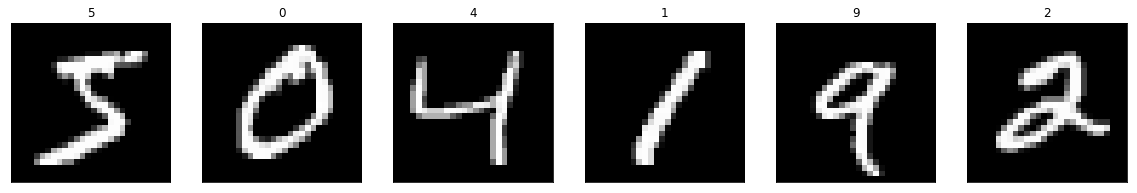

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as cm
import numpy as np


#plot first six training images

fig = plt.figure(figsize=(20,20))
for i in range(6):
  ax = fig.add_subplot(1, 6, i+1, xticks = [], yticks = [])
  ax.imshow(X_train[i], cmap='gray')
  ax.set_title(str(y_train[i]))

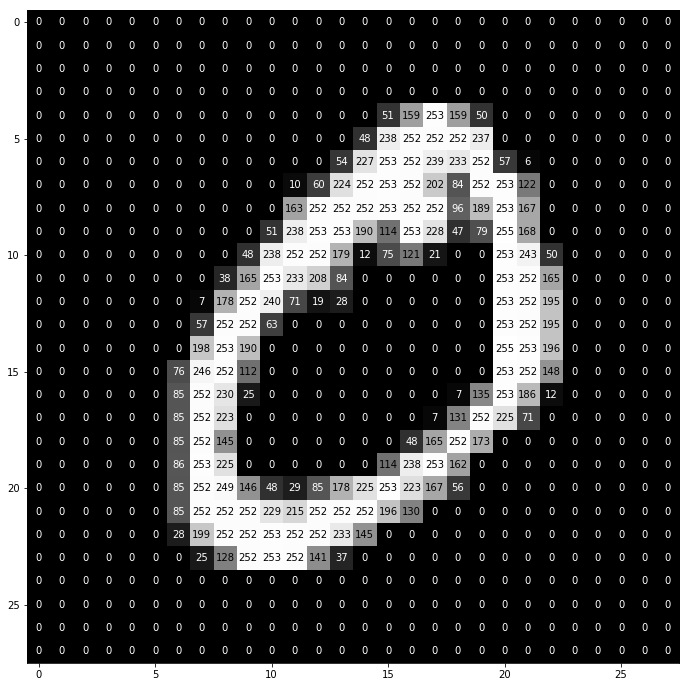

In [18]:
def visualize_input(img, ax):
  ax.imshow(img, cmap='gray')
  width, height = img.shape
#   print(width)
#   print(height)
#   print(img.max())
  thresh = img.max()/2.5
#   print(thresh)
  for x in range(width):
    for y in range(height):
      ax.annotate(str(round(img[x][y], 2)), xy = (y, x),
                 horizontalalignment ='center',
                 verticalalignment = 'center',
                 color = 'white' if img[x][y] < thresh else 'black')
      
      
fig = plt.figure(figsize = (12, 12))
ax = fig.add_subplot(111)
visualize_input(X_train[1], ax)

In [0]:
# rescale images [0, 255] ---> [0, 1]

X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [20]:
from keras.utils import np_utils


print(y_train[:10])

y_train = np_utils.to_categorical(y_train, 10)
y_test = np_utils.to_categorical(y_test, 10)

print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

# define the model

model = Sequential()
model.add(Flatten(input_shape = X_train.shape[1:]))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation = 'softmax'))

# model summary

model.summary()

W0709 06:28:44.914311 139775307802496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0709 06:28:44.962599 139775307802496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0709 06:28:44.987891 139775307802496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0709 06:28:45.004849 139775307802496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0709 06:28:45.014598 

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [24]:
# compile the model

model.compile(loss = 'categorical_crossentropy',
             optimizer = 'rmsprop',
             metrics = ['accuracy'])

W0709 06:31:04.561229 139775307802496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0709 06:31:04.592480 139775307802496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



In [30]:

# evaluate test accuracy before training
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 14.4300%


In [34]:
from keras.callbacks import ModelCheckpoint

# train the model
checkpointer = ModelCheckpoint(filepath='mnist.model.best.hdf5', 
                               verbose=1, save_best_only=True)
hist = model.fit(X_train, y_train, batch_size = 128, epochs = 20, validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.0520 - acc: 0.9844 - val_loss: 0.0944 - val_acc: 0.9778

Epoch 00001: val_loss improved from inf to 0.09436, saving model to mnist.model.best.hdf5
Epoch 2/20
48000/48000 [==============================] - 2s 34us/step - loss: 0.0443 - acc: 0.9868 - val_loss: 0.1008 - val_acc: 0.9762

Epoch 00002: val_loss did not improve from 0.09436
Epoch 3/20
48000/48000 [==============================] - 2s 33us/step - loss: 0.0381 - acc: 0.9881 - val_loss: 0.0955 - val_acc: 0.9779

Epoch 00003: val_loss did not improve from 0.09436
Epoch 4/20
48000/48000 [==============================] - 2s 33us/step - loss: 0.0351 - acc: 0.9900 - val_loss: 0.0938 - val_acc: 0.9795

Epoch 00004: val_loss improved from 0.09436 to 0.09385, saving model to mnist.model.best.hdf5
Epoch 5/20
48000/48000 [==============================] - 2s 33us/step - loss: 0.0309 - acc: 0.9907 - val_loss: 

In [0]:
# load the weights that yielded the best validation accuracy
model.load_weights('mnist.model.best.hdf5')

In [36]:
# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 97.8900%
